<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Descriptive Statistics and Visualizations


## Boxplot for "Median value of Owner Occupied Homes"

The Median Value of Owner Occupied Homes is represented in the data as 'MEDV'.

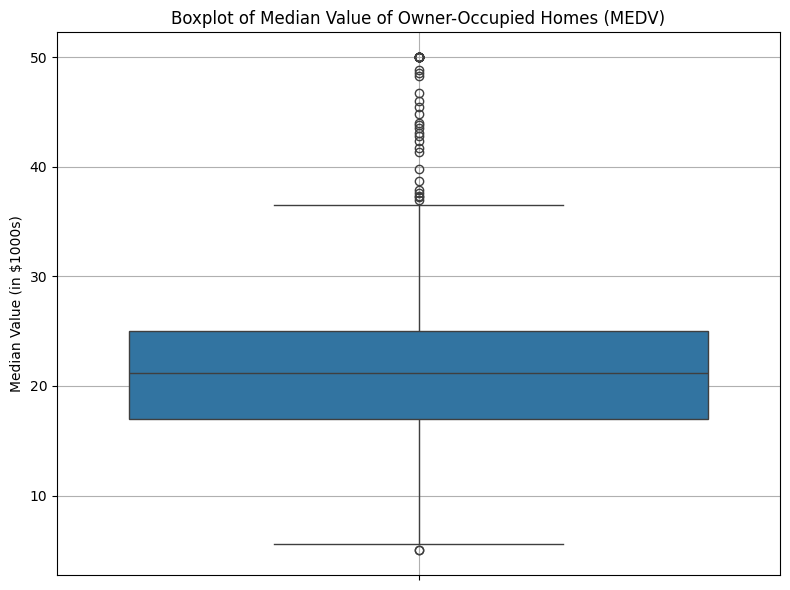

In [8]:
# Set up the plot
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()

## Bar plot of the Charles River Variable

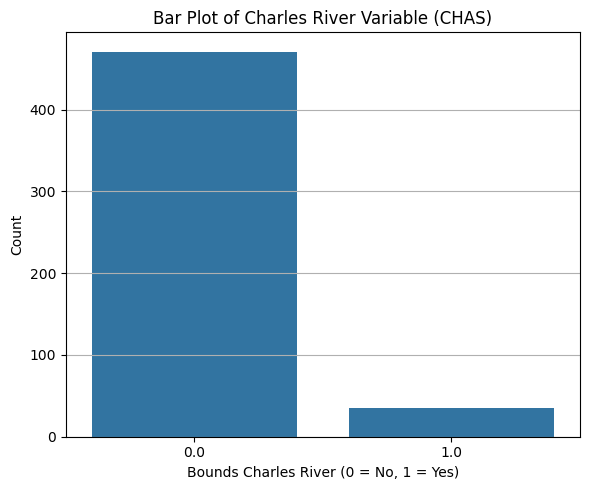

In [9]:
# Set up the bar plot for the CHAS variable
pyplot.figure(figsize=(6, 5))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable (CHAS)')
pyplot.xlabel('Bounds Charles River (0 = No, 1 = Yes)')
pyplot.ylabel('Count')
pyplot.grid(True, axis='y')
pyplot.tight_layout()
pyplot.show()

## Box plot of MEDV vs Age 

The AGE variable was split into three groups:
1. 35 and younger
2. 35 to 70 years old
3. 70 years and older

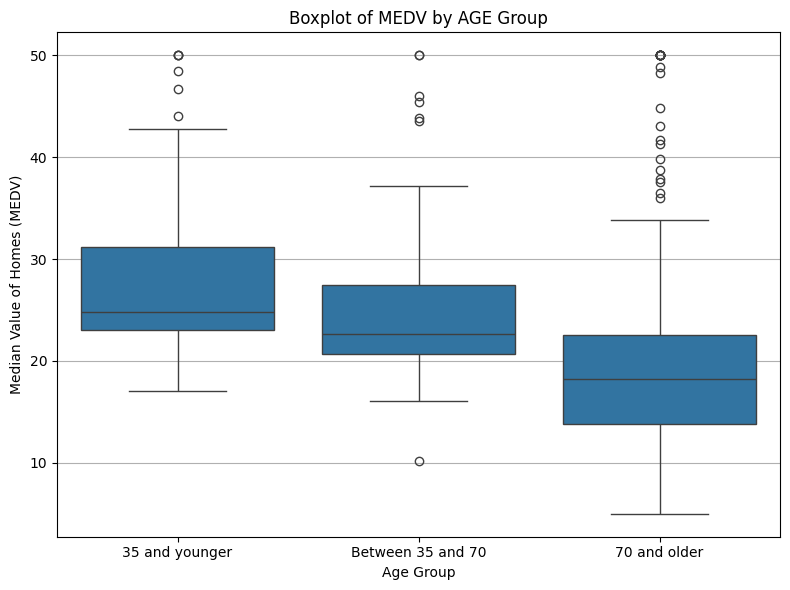

In [10]:
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Plot the boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Homes (MEDV)')
pyplot.grid(True, axis='y')
pyplot.tight_layout()
pyplot.show()

## Scatterplot of Nitric Oxide Concentrations (NOX) vs Proportion of Non-Retail Business Acres per Town (INDUS)

From the plot below, you might spot a positive correlation -- suggesting that the more industrialized areas tend to have higher NOX levels.

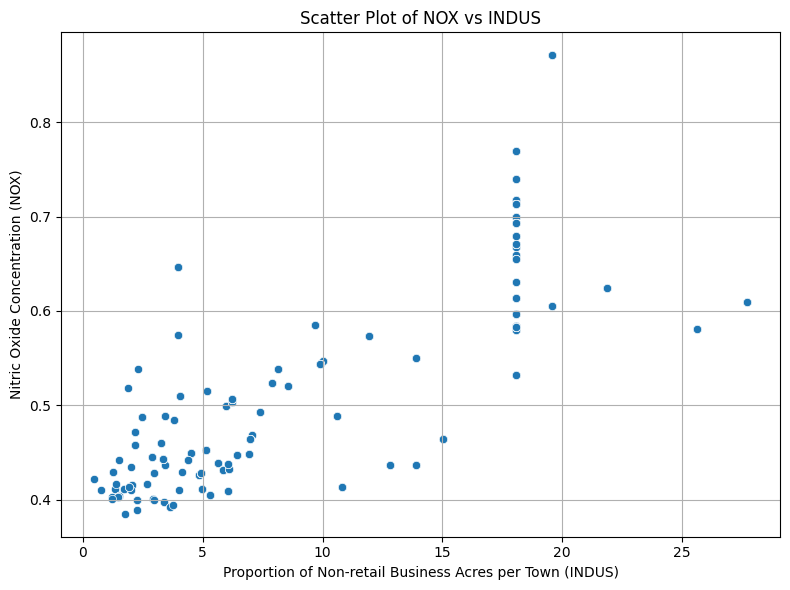

In [11]:
# Scatter plot of NOX vs INDUS
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()

## Histogram of Pupil to Teacher Ration (PTRATIO) variable



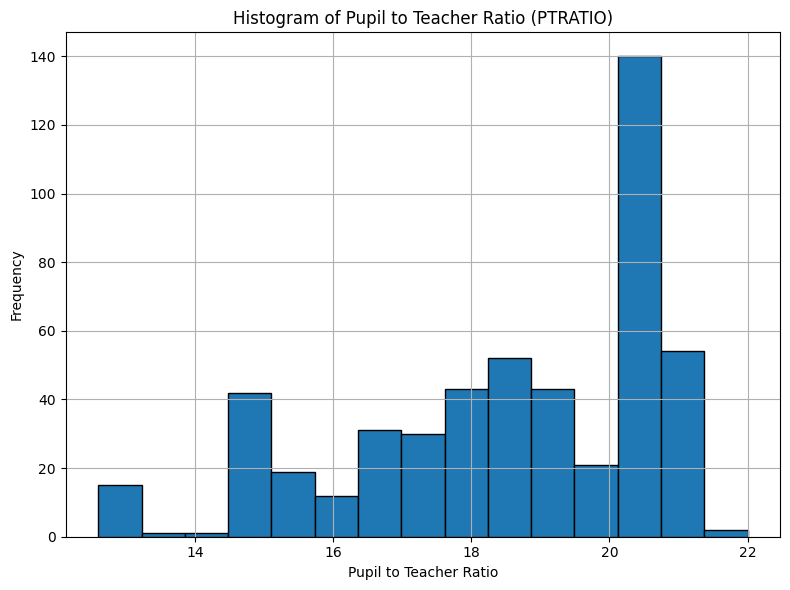

In [12]:
# Histogram of PTRATIO
pyplot.figure(figsize=(8, 6))
pyplot.hist(boston_df['PTRATIO'], bins=15, edgecolor='black')
pyplot.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()

# Task 3 - Statistical Analysis

## Test 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

1. <b>Null Hypothesis (H₀):</b> There is no significant difference between the median value of homes (MEDV) between areas bounded by the Charles River (CHAS = 1) and those that are not.
2. <b>Alternative Hypothesis (H₁):</b> There is a significant difference in MEDV between the two groups.

In [13]:
from scipy.stats import ttest_ind

# Split the MEDV values based on CHAS (0 = not bounded, 1 = bounded)
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform an independent t-test
t_stat, p_value = ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)  # Welch’s t-test

t_stat, p_value

(-3.113291312794837, 0.003567170098137517)

<b>Results:</b>

1. T-statistic: -3.11
2. P-value: 0.0036

Since the p-value is less than 0.05, we reject the null hypothesis.

<b>Interpretation:</b> 

There is a statistically significant difference in the median value of homes between areas that border the Charles River and those that do not.

## Test 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

This will be determined using a one-way ANOVA test

<b>Hypothesis: 

1. Null Hypothesis (H₀): The mean MEDV is the same across all age groups.
2. Alternative Hypothesis (H₁): At least one age group has a different mean MEDV.

We’ll use the three AGE_group bins from earlier:

1. 35 and younger
2. Between 35 and 70
3. 70 and older

In [ ]:
from scipy.stats import f_oneway

# Extract MEDV values by AGE group
group1 = boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == 'Between 35 and 70']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70 and older']['MEDV']

# Perform one-way ANOVA
f_stat, p_value_anova = f_oneway(group1, group2, group3)

f_stat, p_value_anova

<b>Results:</b>

1. F-Statistic: 36.41
2. P-value: 1.71 x 10^-15

Since the p-value is less than 0.05, we reject the null hypothesis.

<b>Interpretation:</b>

There is a statistically significant difference in median home values (MEDV) between at least two of the housing age groups.

## Test 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

This will be determined using a Pearson Correlation.

1. <b>Null Hypothesis:</b> There is no linear relationship between NOX and INDUS (correlation coefficient = 0).
2. <b>Alternative Hypothesis:</b> There is a linear relationship between NOX and INDUS (correlation coefficient ≠ 0)

In [15]:
from scipy.stats import pearsonr

# Compute Pearson correlation between NOX and INDUS
corr_coef, p_value_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])

corr_coef, p_value_corr

(0.7636514469209192, 7.913361061210442e-98)

<b>Results:</b>

1. Correlation Coefficient: 0.764
2. P-value: 7.91 x 10^-98

Since the p-value is less than 0.05, we reject the null hypothesis.

<b>Interpretation:</b>

There is a strong, statistically significant positive correlation between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

So no — we cannot conclude there is no relationship. Quite the opposite — the relationship is strong and significant.

## Test 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

This will be done using a simple linear regression to analyze how:

1. The weighted distance to five Boston employment centers (DIS) impacts
2. The median value of owner-occupied homes (MEDV)

<b>Hypothesis:</b>

1. <b>Null Hypothesis (H₀):</b> The slope coefficient for DIS is 0 (i.e., DIS has no effect on MEDV)
2. <b>Alternative Hypothesis (H₁):</b> The slope coefficient for DIS is not 0 (i.e., DIS affects MEDV)

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit linear regression model: MEDV ~ DIS
model = ols("MEDV ~ DIS", data=boston_df).fit()

# Output the regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        11:54:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Model Result:</b> MEDV ~ DIS

<b>Key Coefficients:</b>
1. Intercept: 18.39
2. Slope: 1.09
3. P-value for DIS: < 0.0001
4. R-squared: 0.062

Since p-value for DIS < 0.05, we reject the null hypothesis.

<b>Interpretation:</b>

1. An additional unit of weighted distance from employment centers is associated with an increase of ~$1,091 in the median home value.
2. However, R² = 0.062, meaning the model explains only 6.2% of the variance in MEDV. The relationship is significant but not strongly predictive on its own.
